In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import sklearn 
from skimage import transform
from skimage.transform import rotate, AffineTransform,warp
from skimage.util import random_noise
from skimage import util , io
from skimage.filters import gaussian
from sklearn import preprocessing
import numpy as np

import cv2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#utilities

# Show the figures / plots inside the notebook
# instead of io.imshow(gaussedImg) and plt.show() each time
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 


In [18]:
import os
trainData = []
trainLabels = []

dire="dataSet/trainData" 

print(os.listdir(dire))

for innerDir in os.listdir(dire):
    for filename in os.listdir(dire+'/' +innerDir):
        image = io.imread(dire+'/' + innerDir +'/' +filename)/255.0
        image = np.copy(image)
        
        trainData.append(image.flatten())
        trainLabels.append(innerDir)

print("trainData Size:", len(trainData), "and trainLabels size:", len(trainLabels))

['10', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'club', 'diamond', 'heart', 'J', 'K', 'Q', 'spade']
trainData Size: 4015 and trainLabels size: 4015


In [19]:
from sklearn.model_selection import train_test_split

# split the data
trainData, testData, trainLabels, testLabels = train_test_split(trainData, trainLabels, test_size = 0.1 , random_state=50)


In [20]:
model_KNN = KNeighborsClassifier(n_neighbors=17, weights='distance',n_jobs=-1) 
model_KNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=17, weights='distance')

In [21]:
from sklearn import svm

model_SVC = svm.SVC(gamma=.001,C=100)
model_SVC.fit(trainData, trainLabels)

SVC(C=100, gamma=0.001)

In [22]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(testData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(testLabels, Labels_SVM_pred)) # validate the model

SVM Model Accuarcy 0.9925373134328358


In [24]:
import random 

count  = 0
LIMIT = 100
for i in range(LIMIT):
    randomIndex = random.randint(0,len(testLabels))
    print("Predicted", testLabels[randomIndex], "as", model_SVC.predict([testData[randomIndex]])[0])
    if (testLabels[randomIndex] == model_SVC.predict([testData[randomIndex]])[0]):
        count += 1
print(count, "Passed out of", LIMIT)

Predicted Q as Q
Predicted J as J
Predicted diamond as diamond
Predicted spade as spade
Predicted K as K
Predicted 10 as 10
Predicted 9 as 9
Predicted 6 as 6
Predicted 5 as 5
Predicted K as K
Predicted Q as Q
Predicted spade as spade
Predicted club as 3
Predicted heart as heart
Predicted diamond as diamond
Predicted spade as spade
Predicted 4 as 4
Predicted club as club
Predicted spade as spade
Predicted 2 as 2
Predicted diamond as diamond
Predicted club as club
Predicted spade as spade
Predicted diamond as diamond
Predicted 7 as 7
Predicted heart as heart
Predicted 10 as 10
Predicted club as club
Predicted spade as spade
Predicted spade as spade
Predicted club as club
Predicted spade as spade
Predicted spade as spade
Predicted 3 as 3
Predicted club as club
Predicted heart as heart
Predicted diamond as diamond
Predicted K as K
Predicted 2 as 2
Predicted club as club
Predicted club as club
Predicted 4 as 4
Predicted 2 as 2
Predicted club as club
Predicted K as K
Predicted club as club
P

KNN: ['10'] SVM: ['Q']


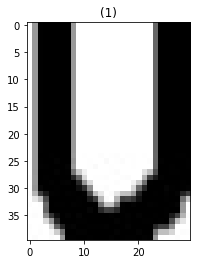

KNN: ['10'] SVM: ['10']


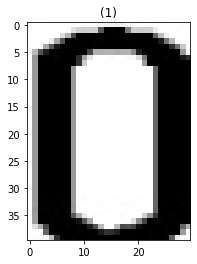

KNN: ['heart'] SVM: ['heart']


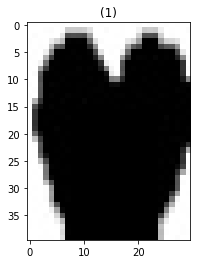

KNN: ['5'] SVM: ['5']


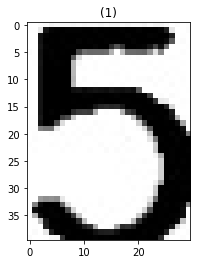

KNN: ['heart'] SVM: ['heart']


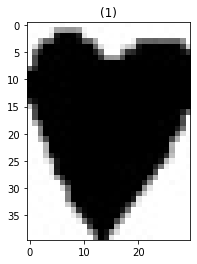

KNN: ['J'] SVM: ['J']


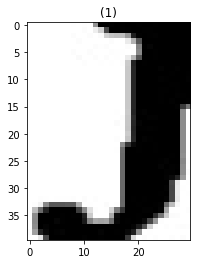

KNN: ['club'] SVM: ['spade']


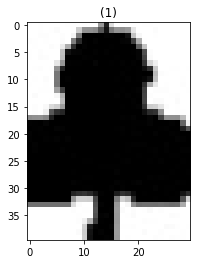

KNN: ['10'] SVM: ['10']


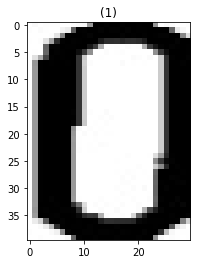

KNN: ['club'] SVM: ['club']


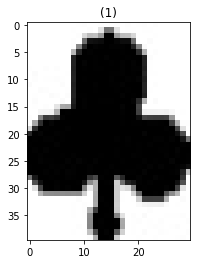

KNN: ['9'] SVM: ['9']


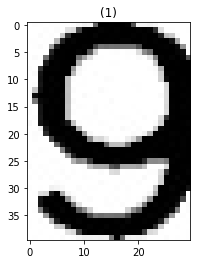

KNN: ['diamond'] SVM: ['diamond']


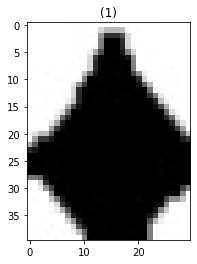

KNN: ['A'] SVM: ['A']


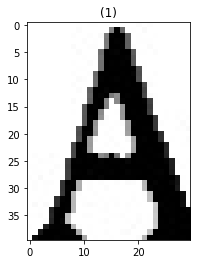

KNN: ['10'] SVM: ['Q']


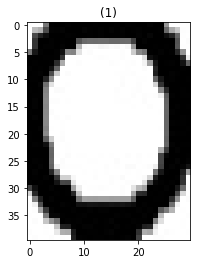

KNN: ['club'] SVM: ['club']


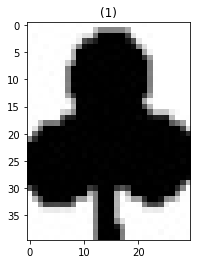

KNN: ['10'] SVM: ['10']


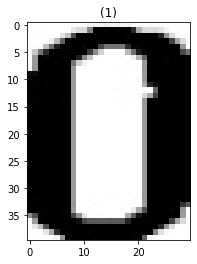

KNN: ['heart'] SVM: ['heart']


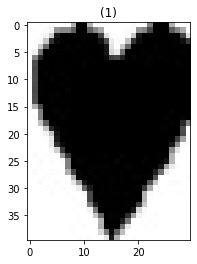

KNN: ['J'] SVM: ['J']


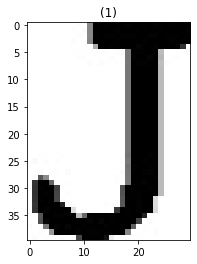

KNN: ['club'] SVM: ['club']


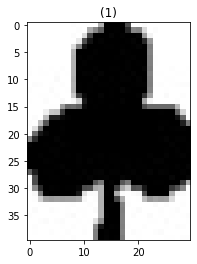

KNN: ['10'] SVM: ['10']


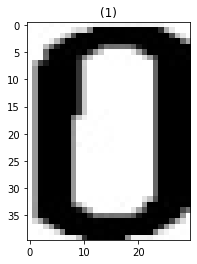

KNN: ['heart'] SVM: ['heart']


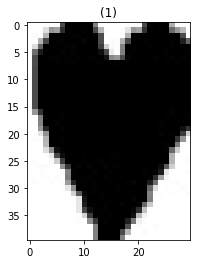

KNN: ['J'] SVM: ['J']


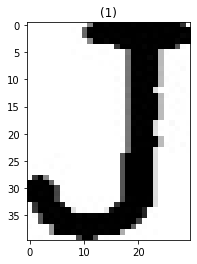

KNN: ['heart'] SVM: ['heart']


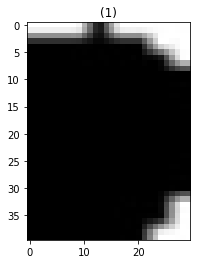

KNN: ['diamond'] SVM: ['diamond']


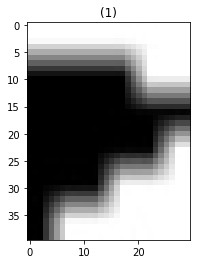

KNN: ['8'] SVM: ['8']


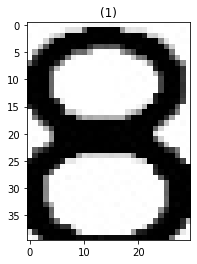

KNN: ['heart'] SVM: ['heart']


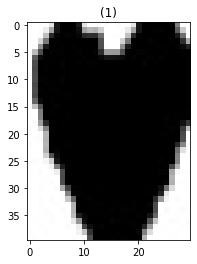

KNN: ['J'] SVM: ['J']


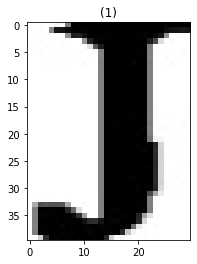

KNN: ['diamond'] SVM: ['diamond']


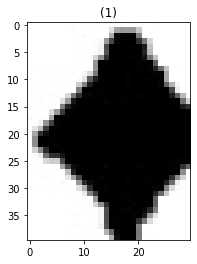

KNN: ['A'] SVM: ['A']


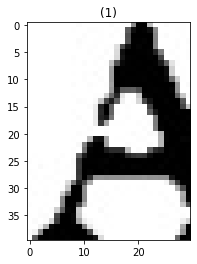

KNN: ['club'] SVM: ['club']


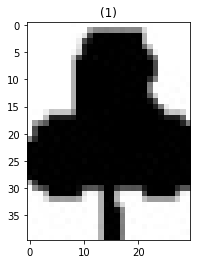

KNN: ['10'] SVM: ['10']


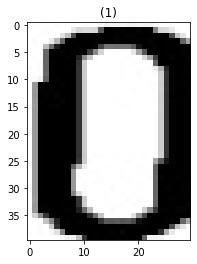

KNN: ['diamond'] SVM: ['diamond']


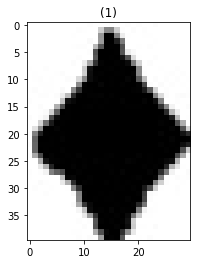

KNN: ['5'] SVM: ['5']


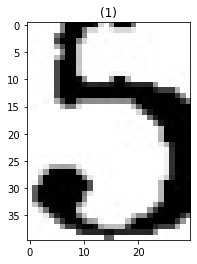

KNN: ['heart'] SVM: ['heart']


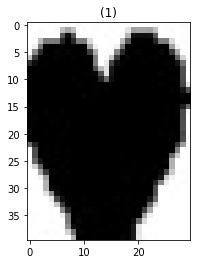

KNN: ['J'] SVM: ['J']


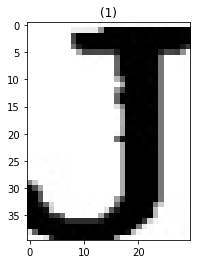

KNN: ['J'] SVM: ['3']


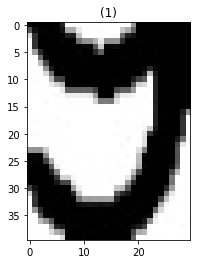

KNN: ['heart'] SVM: ['heart']


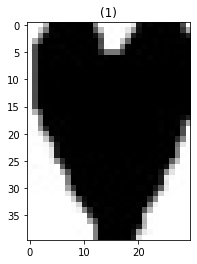

KNN: ['K'] SVM: ['K']


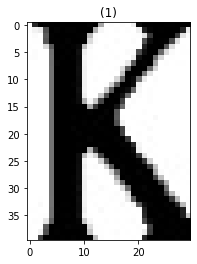

KNN: ['heart'] SVM: ['heart']


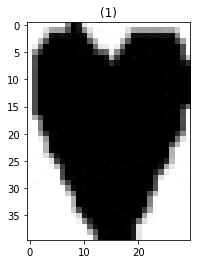

KNN: ['J'] SVM: ['J']


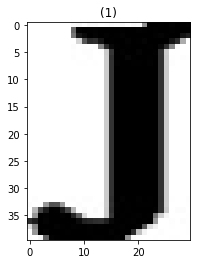

KNN: ['spade'] SVM: ['spade']


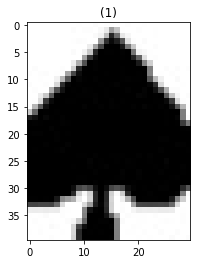

KNN: ['Q'] SVM: ['Q']


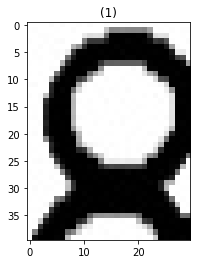

KNN: ['J'] SVM: ['J']


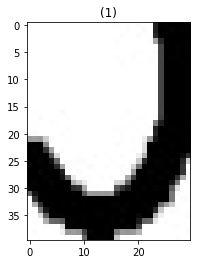

KNN: ['10'] SVM: ['5']


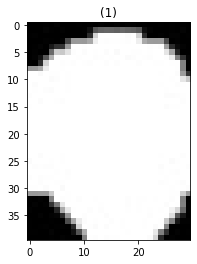

KNN: ['heart'] SVM: ['heart']


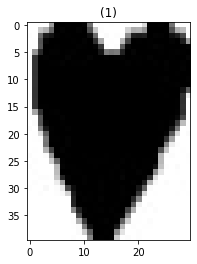

KNN: ['J'] SVM: ['J']


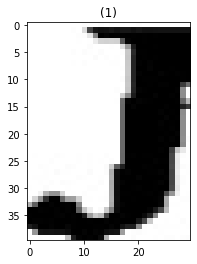

KNN: ['9'] SVM: ['9']


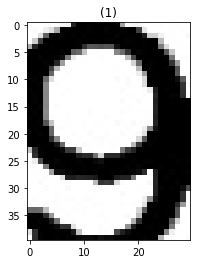

KNN: ['club'] SVM: ['club']


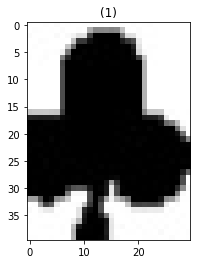

KNN: ['10'] SVM: ['10']


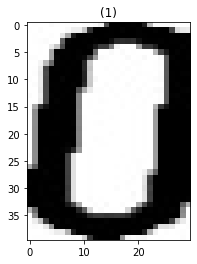

KNN: ['club'] SVM: ['club']


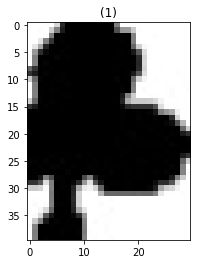

KNN: ['10'] SVM: ['6']


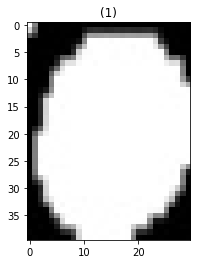

KNN: ['heart'] SVM: ['heart']


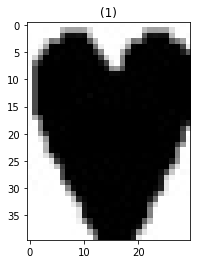

KNN: ['J'] SVM: ['J']


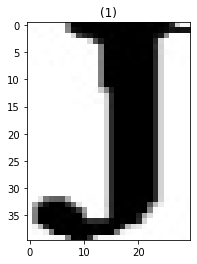

KNN: ['heart'] SVM: ['heart']


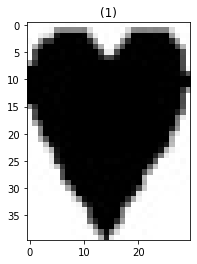

KNN: ['J'] SVM: ['J']


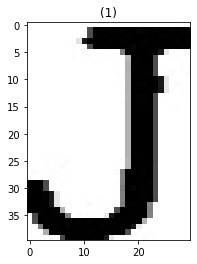

KNN: ['club'] SVM: ['club']


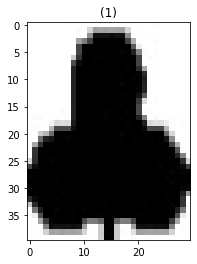

KNN: ['9'] SVM: ['9']


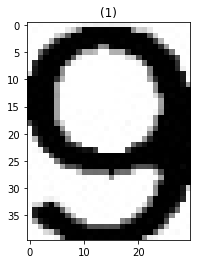

KNN: ['heart'] SVM: ['heart']


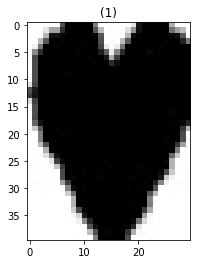

KNN: ['heart'] SVM: ['heart']


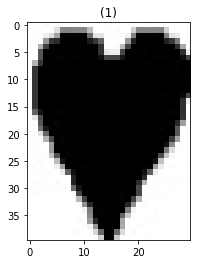

KNN: ['Q'] SVM: ['Q']


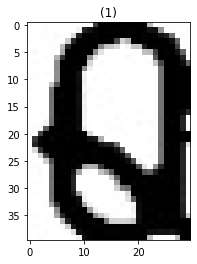

KNN: ['club'] SVM: ['club']


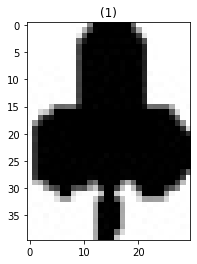

KNN: ['Q'] SVM: ['10']


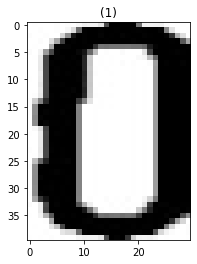

KNN: ['spade'] SVM: ['spade']


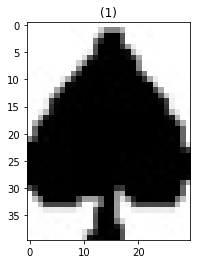

KNN: ['K'] SVM: ['K']


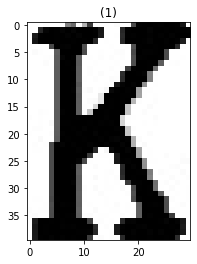

KNN: ['5'] SVM: ['5']


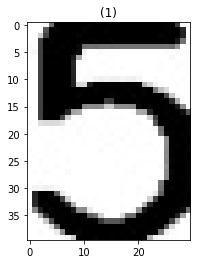

KNN: ['spade'] SVM: ['spade']


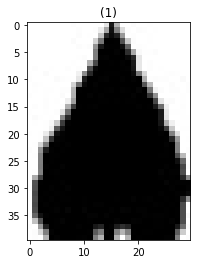

KNN: ['Q'] SVM: ['Q']


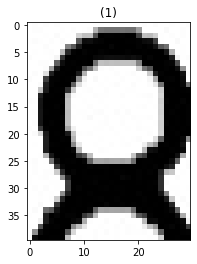

In [23]:
import os

dire="dataSet/testData" 
for filename in os.listdir(dire):
    image = io.imread(dire+'/'+filename)/255.0
    # image.resize(40, 30)
    print("KNN:", model_KNN.predict([image.flatten()]), "SVM:", model_SVC.predict([image.flatten()]))
    # showImage(image)
    # imageInverted = 1-image 
    # print("SVM:", model_SVC.predict([image.flatten()]))
    show_images([image])

In [ ]:
from sklearn.metrics import accuracy_score

# KNN
Labels_KNN_pred = model_KNN.predict(testData) 
print("KNN Model Accuarcy", accuracy_score(testLabels, Labels_KNN_pred)) # validate the model

D:\programing\programs\anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


ValueError: Expected 2D array, got 1D array instead:
array=[array([0.00784314, 0.        , 0.00392157, ..., 0.00784314, 0.01176471,
        0.01960784])
 array([1.        , 0.98039216, 0.98823529, ..., 0.99607843, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([0.00392157, 0.4       , 0.99607843, ..., 0.00784314, 0.01176471,
        0.00392157])
 array([1., 1., 1., ..., 1., 1., 1.]) array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.98039216, 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99215686])
 array([0.99215686, 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.98823529])
 array([1.        , 0.99215686, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.98823529, 1.        , 0.99215686, ..., 0.01176471, 0.00784314,
        0.00784314])
 array([1.        , 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 0.99215686,
        1.        ])
 array([1.        , 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 0.99215686, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.99215686, 1.        , 0.98823529, ..., 0.99607843, 0.99215686,
        1.        ])
 array([0.        , 0.00392157, 0.00392157, ..., 1.        , 0.39215686,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 0.99215686, ..., 0.99607843, 1.        ,
        0.99215686])
 array([0.99607843, 1.        , 0.99215686, ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.00392157,
        0.00392157])
 array([1.        , 0.98823529, 0.99607843, ..., 1.        , 0.99607843,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99215686])
 array([0.98823529, 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.98823529, 0.99607843, 0.99215686, ..., 0.00784314, 0.        ,
        0.01176471])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.01568627,
        0.        ])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 0.99607843, 0.99215686, ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 0.99215686,
        1.        ])
 array([1.        , 0.99607843, 0.99215686, ..., 0.42352941, 0.99215686,
        1.        ])
 array([0.99215686, 1.        , 0.25098039, ..., 0.        , 0.00392157,
        0.00392157])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.98823529, 0.98823529, ..., 0.00392157, 0.        ,
        0.01568627])
 array([0.99607843, 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([1.        , 0.99607843, 0.98823529, ..., 0.        , 0.00784314,
        0.        ])
 array([0.99607843, 0.98823529, 0.99607843, ..., 1.        , 0.98823529,
        0.99215686])
 array([0.99607843, 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98431373, 1.        ,
        0.99607843])
 array([1.        , 0.98823529, 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.99215686, 1.        , ..., 0.99215686, 1.        ,
        0.98431373])
 array([0.99215686, 1.        , 1.        , ..., 0.3254902 , 1.        ,
        1.        ])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.99607843])
 array([0.98431373, 1.        , 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99215686])
 array([1.        , 1.        , 0.99215686, ..., 0.99215686, 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.99215686, 1.        , 0.99607843, ..., 0.        , 0.00784314,
        0.01568627])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        1.        ])
 array([0.99607843, 1.        , 0.98039216, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.        ,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.98431373, 0.99607843,
        1.        ])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.        ,
        0.00784314])
 array([0.99607843, 1.        , 0.99607843, ..., 0.99215686, 1.        ,
        0.98039216])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98431373, 1.        ,
        1.        ])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 0.99607843,
        0.98823529])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 0.25882353, 0.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99215686, 0.98823529, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843])
 array([0.99215686, 1.        , 0.98823529, ..., 1.        , 0.98823529,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99215686, 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.        , 0.01568627, 0.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([0.99215686, 1.        , 1.        , ..., 0.        , 0.15294118,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([0.99607843, 1.        , 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 1.        , 1.        , ..., 0.00392157, 0.29803922,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.98431373, 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.99607843, 1.        , ..., 0.33333333, 0.99607843,
        1.        ])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99215686, 1.        , ..., 0.98823529, 1.        ,
        0.98431373])
 array([0.99215686, 0.99607843, 0.99607843, ..., 1.        , 0.98039216,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.98823529, ..., 1.        , 0.99607843,
        0.99607843])
 array([0.        , 0.10588235, 0.49411765, ..., 0.49803922, 0.10588235,
        0.00392157])
 array([1.        , 1.        , 1.        , ..., 0.09803922, 0.64313725,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99215686])
 array([0.99607843, 0.99215686, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([0.99215686, 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99215686, 0.98431373, 1.        , ..., 0.01568627, 0.        ,
        0.01568627])
 array([0.99607843, 0.98431373, 0.98431373, ..., 1.        , 0.98823529,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.29803922,
        0.99215686])
 array([1., 1., 1., ..., 1., 1., 1.]) array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.98431373, 0.99215686, ..., 0.        , 0.00784314,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        0.99607843])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.98431373, 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.99607843, ..., 0.00784314, 0.        ,
        0.        ])
 array([1.        , 1.        , 0.99215686, ..., 1.        , 0.99607843,
        1.        ])
 array([0.98823529, 1.        , 0.98039216, ..., 1.        , 0.99607843,
        0.99607843])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.98823529, 0.98823529, 1.        , ..., 0.99607843, 0.99607843,
        0.99607843])
 array([1.        , 0.99607843, 0.98039216, ..., 0.98039216, 1.        ,
        0.99215686])
 array([0.98431373, 1.        , 0.99607843, ..., 0.00392157, 0.00392157,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 0.98431373, 1.        , ..., 0.99215686, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.3372549 , 1.        ,
        0.98823529])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 1.        , 0.98823529, ..., 0.        , 0.        ,
        0.01960784])
 array([1.        , 0.99607843, 0.98431373, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99215686,
        0.98823529])
 array([1.        , 0.99607843, 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.        ,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.00392157, 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([0.98823529, 0.99607843, 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.00784314,
        0.        ])
 array([1.        , 0.99607843, 0.98039216, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 0.99607843, ..., 0.98823529, 0.99215686,
        1.        ])
 array([0.99607843, 0.99215686, 0.99607843, ..., 1.        , 0.99607843,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 0.98431373,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 0.98039216, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.00784314, 0.00392157,
        0.01176471])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.98431373])
 array([1.        , 0.99607843, 1.        , ..., 0.00392157, 0.25490196,
        0.98431373])
 array([1.        , 0.98823529, 0.99215686, ..., 0.00784314, 0.        ,
        0.        ])
 array([1.        , 1.        , 0.99215686, ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98039216, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99215686])
 array([0.98431373, 1.        , 0.98823529, ..., 0.98823529, 1.        ,
        0.98431373])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99215686, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.49803922,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.        ,
        0.01568627])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 0.98039216,
        0.97647059])
 array([0.96862745, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.98823529, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.97647059, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.99215686, ..., 1.        , 0.98431373,
        1.        ])
 array([0.99215686, 1.        , 1.        , ..., 0.        , 0.        ,
        0.01568627])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 0.99607843, 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([0.        , 0.04705882, 0.41568627, ..., 0.99607843, 0.99607843,
        0.99607843])
 array([0.98823529, 1.        , 0.99607843, ..., 1.        , 1.        ,
        0.99215686])
 array([0.99607843, 0.46666667, 0.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([0.99215686, 1.        , 0.99215686, ..., 0.99607843, 1.        ,
        0.98823529])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.99607843])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        1.        ])
 array([0.99607843, 0.99215686, 0.99215686, ..., 0.99607843, 0.99607843,
        1.        ])
 array([1.        , 0.99607843, 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.99607843])
 array([1.        , 0.99215686, 0.58823529, ..., 1.        , 0.98823529,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.00392157,
        0.01568627])
 array([1.        , 1.        , 0.99607843, ..., 0.99215686, 0.99607843,
        0.98823529])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 0.99607843,
        0.99215686])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.98431373, 0.99607843,
        1.        ])
 array([0.98431373, 1.        , 0.99215686, ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99215686, 0.99607843, ..., 1.        , 0.98823529,
        0.98823529])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.98823529, 0.99607843, ..., 0.00784314, 0.        ,
        0.        ])
 array([0.        , 0.00392157, 0.00392157, ..., 0.01176471, 0.00784314,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.29411765,
        1.        ])
 array([0.99215686, 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.        ,
        0.01568627])
 array([0.99215686, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 0.98823529, ..., 0.41176471, 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 0.98823529, 1.        , ..., 0.00392157, 0.23529412,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([0.99607843, 1.        , 0.98823529, ..., 0.98431373, 0.99607843,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.        , 0.00784314, 0.00392157, ..., 0.01176471, 0.        ,
        0.        ])
 array([1.        , 0.99607843, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.98431373, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 0.99607843, 1.        ,
        0.99215686])
 array([1.        , 0.98039216, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.20392157,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99215686,
        1.        ])
 array([1.        , 0.99215686, 0.99215686, ..., 0.99607843, 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([0.99215686, 1.        , 1.        , ..., 0.        , 0.01176471,
        0.        ])
 array([1.        , 1.        , 0.99607843, ..., 0.74901961, 0.99607843,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.00392157, 0.00392157,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.99215686, 0.99215686, 1.        , ..., 0.00392157, 0.29803922,
        1.        ])
 array([1.        , 1.        , 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([0.99215686, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.98823529])
 array([0.99607843, 0.49411765, 0.00392157, ..., 0.99215686, 1.        ,
        1.        ])
 array([0.98431373, 0.99607843, 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 0.99215686, ..., 1.        , 0.99607843,
        0.99215686])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99215686,
        0.99215686])
 array([1.        , 0.99215686, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 1.        , 0.98823529, ..., 0.00392157, 0.22745098,
        0.98039216])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([0.99215686, 1.        , 0.98823529, ..., 0.99607843, 0.99215686,
        0.99607843])
 array([0.        , 0.00784314, 0.00784314, ..., 0.01176471, 0.00392157,
        0.00392157])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00392157])
 array([0.01176471, 0.09803922, 0.50588235, ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.98431373])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.01176471, 0.        , 0.00392157, ..., 0.        , 0.00784314,
        0.        ])
 array([0.99215686, 0.45098039, 0.00784314, ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 0.98823529, 0.98823529, ..., 0.99215686, 0.99607843,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.]) array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 1.        , 0.98431373, ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.98823529])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.01568627, 0.        ,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([0.98823529, 0.99607843, 1.        , ..., 0.        , 0.29411765,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 0.98823529,
        1.        ])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        1.        ])
 array([1.        , 0.99607843, 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.98039216, 1.        , 0.98431373, ..., 0.00392157, 0.35294118,
        1.        ])
 array([0.00392157, 0.00784314, 0.00392157, ..., 0.67058824, 0.19607843,
        0.01568627])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.01568627])
 array([1.        , 1.        , 0.98823529, ..., 1.        , 0.99607843,
        0.99607843])
 array([0.98823529, 0.99607843, 0.98823529, ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 1.        , 0.98431373, ..., 0.01176471, 0.        ,
        0.00392157])
 array([1.        , 1.        , 1.        , ..., 0.01568627, 0.36078431,
        0.99215686])
 array([0.99215686, 0.99215686, 0.59215686, ..., 1.        , 1.        ,
        1.        ])
 array([0.99215686, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99215686, 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.00784314])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        0.99607843])
 array([0.98823529, 1.        , 0.98431373, ..., 0.00392157, 0.01176471,
        0.        ])
 array([0.99607843, 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98823529,
        0.99607843])
 array([1.        , 0.98431373, 0.99215686, ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.        , 0.31372549,
        1.        ])
 array([0.99607843, 0.99215686, 1.        , ..., 0.00392157, 0.2627451 ,
        0.99215686])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([0.01176471, 0.00784314, 0.01568627, ..., 0.00784314, 0.        ,
        0.00392157])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.99607843,
        0.99215686])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1.        , 0.99607843, 0.99607843, ..., 0.99607843, 1.        ,
        0.98823529])
 array([1.        , 0.99215686, 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.98823529, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.42352941, 0.98823529,
        0.99215686])
 array([0.98431373, 1.        , 0.99215686, ..., 0.99607843, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([0.99607843, 0.98823529, 0.99215686, ..., 0.        , 0.        ,
        0.00392157])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00784314, 0.        ,
        0.00392157])
 array([0.99607843, 0.99607843, 0.99607843, ..., 0.98823529, 1.        ,
        0.99215686])
 array([1.        , 0.99607843, 0.99607843, ..., 0.        , 0.00392157,
        0.00784314])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99215686, 1.        , 1.        , ..., 0.99215686, 1.        ,
        0.98431373])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1.        , 0.99215686, 0.98823529, ..., 1.        , 0.99215686,
        0.99607843])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([0.99215686, 0.99215686, 0.99607843, ..., 1.        , 1.        ,
        0.99215686])
 array([0.99607843, 1.        , 1.        , ..., 0.99215686, 0.99215686,
        0.99607843])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.98431373, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 0., 0., 0.])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 0.99607843, 0.99607843, ..., 0.        , 0.00392157,
        0.        ])
 array([1.        , 0.98039216, 0.99215686, ..., 0.3254902 , 1.        ,
        0.98039216])
 array([1.        , 1.        , 1.        , ..., 0.49411765, 0.29019608,
        0.99607843])
 array([0.99607843, 1.        , 1.        , ..., 0.98431373, 0.98823529,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.00784314, 0.        ,
        0.        ])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 0.99607843,
        0.99215686])
 array([1.        , 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 0.99607843,
        0.99607843])
 array([0.99215686, 0.99607843, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99607843, 0.99215686, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.34901961, 0.00392157, ..., 0.        , 0.34117647,
        0.99215686])
 array([0.01176471, 0.01176471, 0.        , ..., 0.        , 0.        ,
        0.        ])
 array([0.        , 0.00392157, 0.00392157, ..., 0.32941176, 0.79607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        1.        ])
 array([0.00784314, 0.00784314, 0.01176471, ..., 0.00392157, 0.        ,
        0.        ])
 array([0.49019608, 0.        , 0.        , 0.        ])
 array([0.99215686, 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.00392157, 0.        , 0.        , ..., 0.99607843, 0.99215686,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 0.99607843,
        0.98823529])
 array([0.98823529, 0.99215686, 0.98823529, ..., 1.        , 1.        ,
        1.        ])
 array([0.        , 0.        , 0.00392157, ..., 0.00784314, 0.        ,
        0.        ])
 array([0.98823529, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.98823529, 1.        ,
        0.98823529])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 1.        , 0.99607843, ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 0.98039216,
        1.        ])
 array([1.        , 0.99607843, 0.99215686, ..., 1.        , 1.        ,
        0.98431373])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([0.99607843, 0.98823529, 1.        , ..., 1.        , 0.99607843,
        1.        ])
 array([1.        , 0.99215686, 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([0.98823529, 0.99607843, 0.99607843, ..., 0.99607843, 1.        ,
        1.        ])
 array([0.00784314, 0.        , 0.        , ..., 0.32941176, 0.79607843,
        0.98823529])
 array([1.        , 0.98431373, 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1., 1., 1., ..., 1., 1., 1.])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.99215686, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99215686])
 array([1.        , 1.        , 1.        , ..., 0.58039216, 1.        ,
        0.99607843])
 array([0.99607843, 1.        , 1.        , ..., 0.        , 0.30588235,
        0.99215686])
 array([1.        , 1.        , 0.99607843, ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.50196078, 1.        ,
        0.97647059])
 array([0.99607843, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([1.        , 0.99215686, 0.99607843, ..., 0.99607843, 1.        ,
        1.        ])
 array([0.99607843, 1.        , 0.99607843, ..., 0.82352941, 0.99607843,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 0.99607843, 1.        ,
        0.99607843])
 array([1.        , 1.        , 1.        , ..., 0.98039216, 1.        ,
        1.        ])
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99607843])
 array([0.99607843, 1.        , 1.        , ..., 0.99607843, 0.99215686,
        1.        ])
 array([1.        , 0.98823529, 1.        , ..., 1.        , 1.        ,
        1.        ])
 array([0.99607843, 1.        , 0.98823529, ..., 1.        , 1.        ,
        1.        ])                                                    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import accuracy_score

# SVM
Labels_SVM_pred = model_SVC.predict(testData) # test -predict the test trainData-
print("SVM Model Accuarcy", accuracy_score(testLabels, Labels_SVM_pred)) # validate the model